A) Set a seed (to ensure work reproducibility) and take a random sample of  25 observations and find the mean Glucose and highest Glucose values of this sample and compare these statistics with the population statistics of the same variable. You should use charts for this comparison.    

In [10]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# Load the data
diab_dt= pd.read_csv("/content/diabetes.csv")

# Set seed for reproducibility
np.random.seed(42)

# Take a random sample of 25 observations
sample = diab_dt.sample(n=25)

# Calculate mean and highest glucose values for sample and population
mean_glucose_sample = round(sample['Glucose'].mean(),2)
print("Mean of Glucose Values for Sample: ", mean_glucose_sample)
highest_glucose_sample = sample['Glucose'].max()
print("Highest of Glucose Values for Sample: ", highest_glucose_sample)
mean_glucose_population = round(diab_dt['Glucose'].mean(),2)
print("Mean of Glucose Values for Population: ", mean_glucose_population)
highest_glucose_population = diab_dt['Glucose'].max()
print("Highest of Glucose Values for Population: ", highest_glucose_population)

Mean of Glucose Values for Sample:  116.64
Highest of Glucose Values for Sample:  183
Mean of Glucose Values for Population:  120.89
Highest of Glucose Values for Population:  199


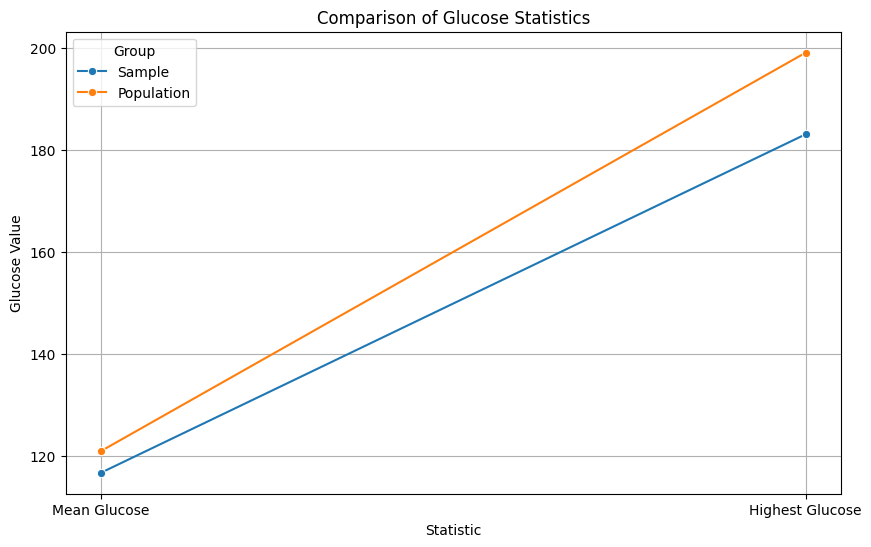

In [15]:
# Compare the statistics using charts
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming the variables are already defined:
# sample_mean_glucose, population_mean_glucose, sample_highest_glucose, population_highest_glucose

# Create a DataFrame for plotting
data = {
    'Statistic': ['Mean Glucose', 'Highest Glucose'],
    'Sample': [mean_glucose_sample,highest_glucose_sample],
    'Population': [mean_glucose_population, highest_glucose_population]
}
df = pd.DataFrame(data)
df = pd.melt(df, id_vars="Statistic", var_name="Group", value_name="Glucose Value")

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(x='Statistic', y='Glucose Value', hue='Group', data=df, marker='o')
plt.title('Comparison of Glucose Statistics')
plt.ylabel('Glucose Value')
plt.grid(True)
plt.show()

B) Find the 98th percentile of BMI of your sample and the population and compare the results using charts

In [16]:
# Find the 98th percentile of BMI for sample and population
bmi_98th_percentile_sample = np.percentile(sample['BMI'], 98)
print("Sample 98th percentile BMI:", round(bmi_98th_percentile_sample, 2))
bmi_98th_percentile_population = np.percentile(diab_dt['BMI'], 98)
print("Population 98th percentile BMI:", round(bmi_98th_percentile_population, 2))

Sample 98th percentile BMI: 40.25
Population 98th percentile BMI: 47.53


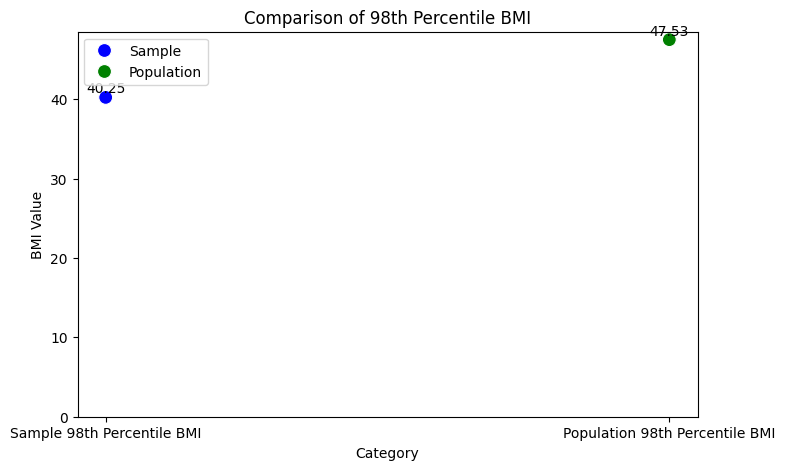

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data preparation
data = {
    'Category': ['Sample 98th Percentile BMI', 'Population 98th Percentile BMI'],
    'BMI Value': [bmi_98th_percentile_sample, bmi_98th_percentile_population],
    'Group': ['Sample', 'Population']
}
df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Category', y='BMI Value', hue='Group', data=df, s=100, palette=['blue', 'green'])

# Annotating values
for index, row in df.iterrows():
    plt.text(x=index, y=row['BMI Value'] + 0.2, s=f"{row['BMI Value']:.2f}",
             ha='center', va='bottom', fontsize=10, color='black')

plt.title('Comparison of 98th Percentile BMI')
plt.ylabel('BMI Value')
plt.legend(title=None)
plt.ylim(0, max(df['BMI Value']) + 1)  # Adjusting y-axis limits for better visualization
plt.show()


(C) Using bootstrap (replace= True), create 500 samples (of 150 observation each) from the population and find the average mean, standard deviation and percentile for BloodPressure and compare this with these statistics from the population for the same variable.

In [18]:
def calculate_bootstrap_stats(data, num_bootstrap_samples=500, bootstrap_sample_size=150):
    bootstrap_means = []
    bootstrap_stds = []
    bootstrap_medians = []  # Renamed for clarity as it's actually the median being calculated

    for _ in range(num_bootstrap_samples):
        bootstrap_sample = data.sample(n=bootstrap_sample_size, replace=True)
        bootstrap_means.append(bootstrap_sample['BloodPressure'].mean())
        bootstrap_stds.append(bootstrap_sample['BloodPressure'].std())
        bootstrap_medians.append(np.percentile(bootstrap_sample['BloodPressure'], 50))  # Using median

    return bootstrap_means, bootstrap_stds, bootstrap_medians

# Calculating bootstrap statistics
bootstrap_means, bootstrap_stds, bootstrap_medians = calculate_bootstrap_stats(diab_dt)

# Calculating population statistics
mean_blood_pressure_population = diab_dt['BloodPressure'].mean()
print("Population Mean BP:", round(mean_blood_pressure_population, 2))
std_blood_pressure_population = diab_dt['BloodPressure'].std()
print("Population Standard BP:", round(std_blood_pressure_population, 2))
median_blood_pressure_population = np.percentile(diab_dt['BloodPressure'], 50)
print("Population Median BP:", round(median_blood_pressure_population, 2))

Population Mean BP: 69.11
Population Standard BP: 19.36
Population Median BP: 72.0


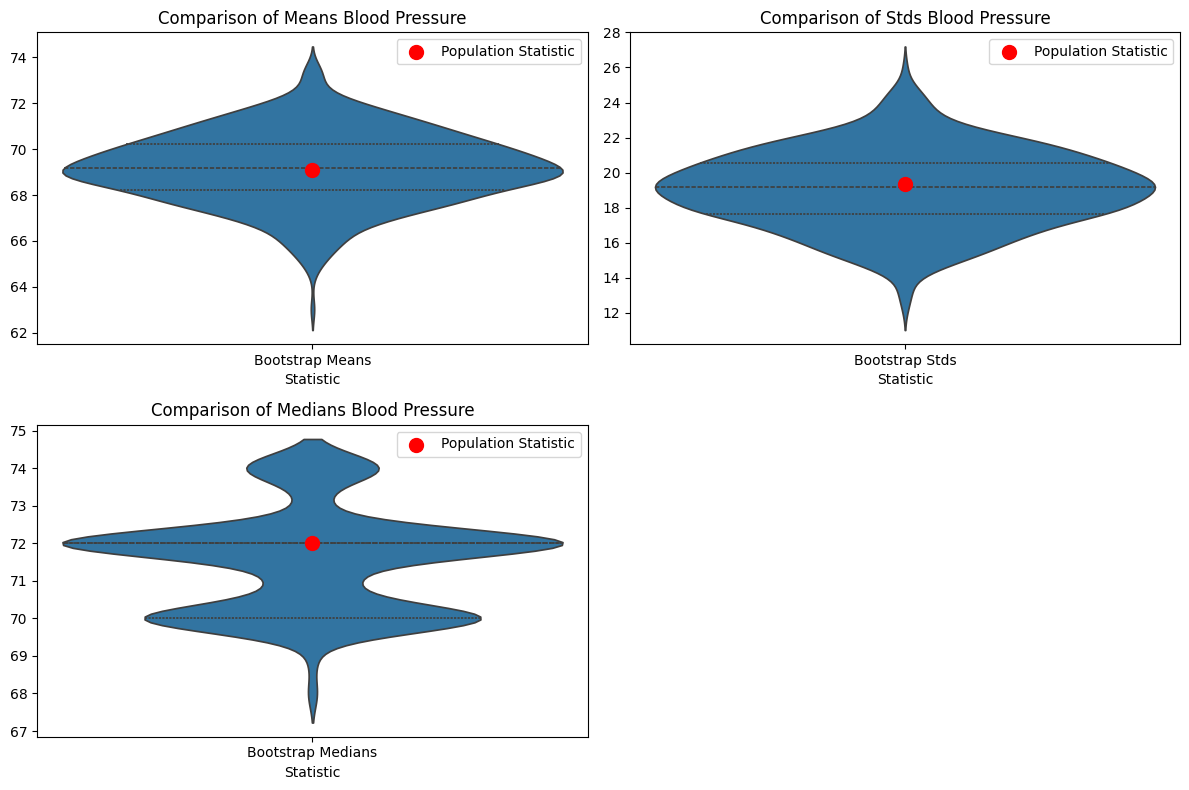

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Preparing data for plotting
data = {
    'Bootstrap Means': bootstrap_means,
    'Bootstrap Stds': bootstrap_stds,
    'Bootstrap Medians': bootstrap_medians  # Updated to reflect the correct statistic
}
df = pd.DataFrame(data)
df_melted = pd.melt(df, var_name='Statistic', value_name='Value')

# Population statistics for comparison
population_stats = {
    'Statistic': ['Bootstrap Means', 'Bootstrap Stds', 'Bootstrap Medians'],
    'Value': [mean_blood_pressure_population, std_blood_pressure_population, median_blood_pressure_population]
}
population_df = pd.DataFrame(population_stats)

# Plotting
plt.figure(figsize=(12, 8))

# Violin plot for each statistic
for i, stat in enumerate(['Bootstrap Means', 'Bootstrap Stds', 'Bootstrap Medians'], 1):
    plt.subplot(2, 2, i)
    sns.violinplot(x='Statistic', y='Value', data=df_melted[df_melted['Statistic'] == stat], inner='quartile')
    plt.scatter(x=0, y=population_df.loc[i-1, 'Value'], color='red', s=100, label='Population Statistic', zorder=5)
    plt.title(f'Comparison of {stat.split()[1]} Blood Pressure')
    plt.ylabel('')
    plt.legend()

plt.tight_layout()
plt.show()

**Observations:**

1.Glucose Statistics:

The sample group's mean glucose level is lower than that of the population, yet it exhibits a higher maximum glucose value, indicating greater variation. This disparity suggests the sample may have more extreme values in its glucose level distribution compared to the overall population.


2.BMI statistics:

The graph presents a comparison of the 98th percentile BMI values, showing that the sample's 98th percentile BMI is significantly lower than that of the population. This suggests that higher BMI values are more prevalent in the overall population compared to the sample.


3.Blood Pressure(BP) Statistics:

The graphs are violin plots comparing the bootstrap means and medians of blood pressure with the population's corresponding values, depicted as red dots. The distribution shapes indicate the variability of the bootstrap samples, with the population statistics falling within the range of the bootstrap-generated values for both means and median.










